In [2]:
%%html
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600&family=Roboto:wght@300&display=swap" rel="stylesheet">
<style>
h1,h2,h3,h4,h5{
font-family: 'Roboto', sans-serif;
}
h2{
    color:#1f287a;
}
h1{
    text-align:center;
    color:#0e66eb;
    text-shadow:0.5px 0.5px 0.5px black;
}
</style>

<h1>Covid 19 Prediction</h1>
<h2>CSE381 Final Project</h2>
<h2><b>Authors:</b></h2><br>
   <h3>Mohammed Ahmed Abdelmegeed 19P1298</h3>
   <h3>Mohammed Ahmed Abdelmoniem 19P5170</h3>
   <h3>Mohamed Fathy 19P4704</h3>

In [3]:
# importing the dataset

import pandas as pd
df = pd.read_csv('data.csv' ,index_col=0)
dataFrame = pd.read_csv('data.csv' ,index_col=0) #Have another copy for the original dataframe

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score

## 1. Understanding The Data

Our goal in this project, is to use different types of classifiers such as:
<ol>
    <li>Support Vector Machines</li>
    <li>K-Nearest Neighbours</li>
    <li>Bayes Classifier</li>
    <li>Decision Tree</li>
    <li>Multilayer Perceptron</li>
</ol>
in order to predict if people are affected by COVID-19 using the dataset we have in hand. The dataset that we will work with is going to be divided into 2 parts, the training and testing parts. Using the testing data we can measure the accuracy of each way of classification and compare them between each other.

In [5]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [7]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


## 2. Preprocessing

In this part, we are going to go through the process of cleaning the data and preprocessing it, in order to maximize the accuracy of our model. Steps in the preprocessing phase includes checking for outliers, normailizing the data, and finding correlations between features and each other.

### 2.1 Detecting Missing Records

In [8]:
print(df.isnull().sum())

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64


There were no null values found in our dataset, hence we don't need to fill any missing data

### 2.2 Data Normalization
All features are going to be normalized so that all features are between 0 and 1. This is done so that all the features can have an equal weight when the model training process is taking place. Normalization is going to be carried out using the MinMax scaler, using 0 as the minimum value and 1 as the maximum value. Some fetaures are already 0 and 1, such as the <i>gender</i>, <i>vis_wuhan</i>, and <i>from_wuh</i>.

In [9]:
from sklearn.preprocessing import MinMaxScaler
def scaler(df,arr):
    dataframe_N=df[arr]
    scale = MinMaxScaler(feature_range=(0,1))
    norm_data=scale.fit_transform(dataframe_N)
    return norm_data
df[['age','country','location','diff_sym_hos','symptom1', 'symptom2','symptom3', 'symptom4', 'symptom5','symptom6']]=scaler(df,['age','country','location','diff_sym_hos','symptom1', 'symptom2','symptom3', 'symptom4', 'symptom5','symptom6'])
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0.753623,0.242424,1,0.680851,1,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.65,1
1,0.731884,0.242424,0,0.574468,0,1,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
2,0.992754,0.242424,1,0.468085,0,1,0.583333,1.0,1.0,1.0,1.0,1.0,0.90,0
3,0.840580,0.242424,0,0.617021,1,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
4,0.840580,0.242424,1,0.595745,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.347826,0.090909,2,0.234043,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,1
859,0.000000,0.000000,2,0.351064,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
860,0.021739,0.030303,1,0.504255,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
861,0.173913,0.272727,1,0.504255,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0


### 2.3 Visualizing Correlation Between features

Splitting the feature and target

In [10]:
x = df.iloc[:,1:-1] # Features columns
y = df['result'] # Target column

In [11]:
df.corr()['result']

location        0.046240
country        -0.094443
gender         -0.061441
age             0.515127
vis_wuhan      -0.151122
from_wuhan      0.128314
symptom1       -0.163039
symptom2       -0.103270
symptom3       -0.074982
symptom4       -0.108723
symptom5        0.020676
symptom6        0.012882
diff_sym_hos    0.219116
result          1.000000
Name: result, dtype: float64

Just by looking at the data above, we can tell immediately that age is the major factor and highly correlated with people with COVID-19. As age increases, it is more likely to die from COVID.

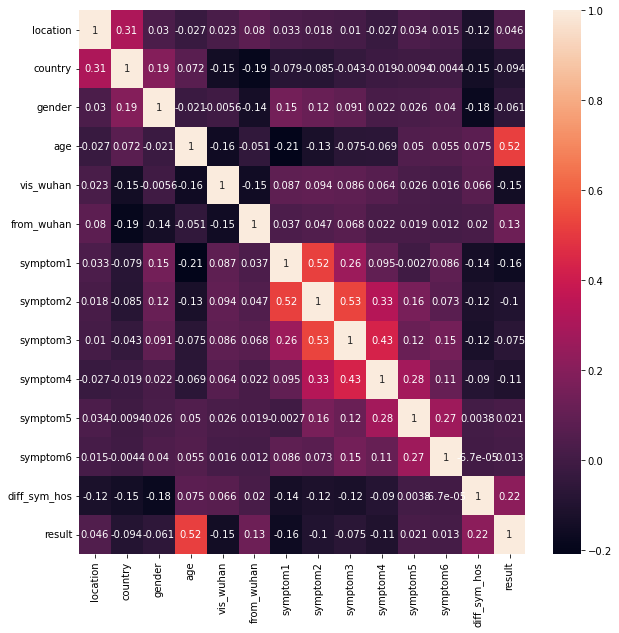

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True)

By looking at the heatmap above, we can conclude that symptom 2 and 3 are moderatley correlated, symptom 1 and 2 are also moderatley correlated. There are no features which are strongly correlated assuming the threshold for strongly correlated features is >0.6.

In [13]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (517, 12)
X_test shape: (173, 12)
X_val shape: (173, 12)
y_train shape: (517,)
y_test shape: (173,)
y_val shape: (173,)


## 3 K-Nearest Neighbour (KNN)
This approach basically receives the input point, and the model is going to classify the point to the cluster with the most neighbours out of the total K neighbours. Deciding the value of K can be challenging because it is the only hyperparameter in this algorithm, but there are 2 ways to find the best value for K. The first way is by using the K-cross validation method, and the second way is by using the formula sqrt(N)/2, where N is the total number of data points or samples.

### 3.1 Using K-Fold Cross Validation
In the following piece of code, we try each value for K from 4 up to 31, and for each value we use 5-folds to calculate the accuracy of the given model. Then we plot the values of K against their acuracy score, to determine the best value for K.

In [14]:
k_values = [i for i in range (4,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

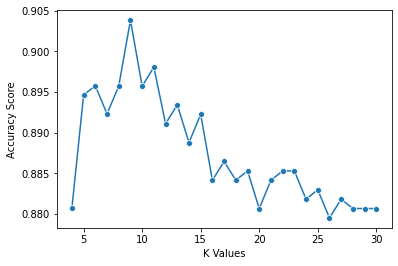

In [15]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

By looking at the chart above, we can conclude that the best value for K is between 5-8.

 ### 3.2 Fitting and evaluating the model

In [16]:
#Set number of K to 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.884393063583815


### 3.3 KNN Evaluation metrics

In [17]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['0','1']))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       143
           1       0.78      0.47      0.58        30

    accuracy                           0.88       173
   macro avg       0.84      0.72      0.76       173
weighted avg       0.88      0.88      0.87       173

0.7193473193473193


### 3.4 Plotting ROC/AUC Curve

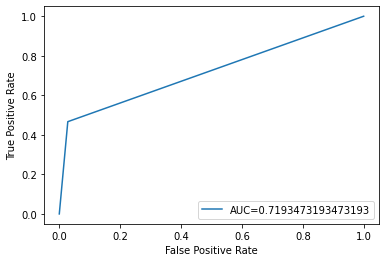

In [18]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 4 Support Vector Machine (SVM)
The SVM algorithm is a linear classifer and really simple compared to other classifiers. Basically,the classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points. We are going to apply the SVM algorithm on the same dataframe used for KNN, to ensure a fair comparison will take place.

### 4.1 Linear Kernel

In [54]:
from sklearn import svm

#Create an svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = clf.predict(X_test)

#Print accuracy of the model
print("Accuracy:",accuracy_score(y_test, y_pred_SVM))

Accuracy: 0.9075144508670521


### 4.2 RBF Kernel

In [55]:
clf2 = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM2 = clf2.predict(X_test)

#Print accuracy of the model
print("Accuracy:",accuracy_score(y_test, y_pred_SVM2))

Accuracy: 0.8554913294797688


### 4.3 Sigmoid Kernel

In [56]:
clf3 = svm.SVC(kernel='sigmoid') # Sigmoid Kernel

#Train the model using the training sets
clf3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM3 = clf3.predict(X_test)

#Print accuracy of the model
print("Accuracy:",accuracy_score(y_test, y_pred_SVM3))

Accuracy: 0.8208092485549133


Now, it is really difficult to visualize how the SVM classifier seperates the data points due to the large number of points. But as we can see, the accuracy for SVM (90.75%) is considerably higher than the KNN (88.9%). But not all variations of the SVM yield better accuracy than the KNN, only the linear kernel is better than the KNN. Both the RBF and sigmoid kernels had less accuarcy than the KNN and the SVM with linear kernel.

### 4.4 Plotting SVM ROC/AUC Curve

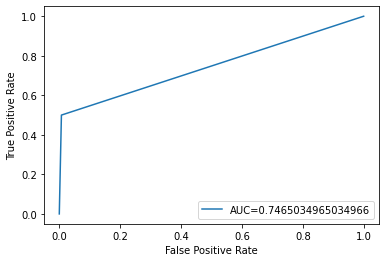

In [22]:
fpr_SVM, tpr_SVM, _ = roc_curve(y_test,  y_pred_SVM)
auc_SVM = roc_auc_score(y_test, y_pred_SVM)

plt.plot(fpr_SVM,tpr_SVM,label="AUC="+str(auc_SVM))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 4.5 SVM Evaluation Metrics
Bare in mind that we are evaluating the SVM with linear kernel because it had the highest accuracy between the 3 different kernels.

In [21]:
confusion_matrix(y_test, y_pred_SVM)
print(classification_report(y_test, y_pred, target_names=['0','1']))
print(roc_auc_score(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       143
           1       0.78      0.47      0.58        30

    accuracy                           0.88       173
   macro avg       0.84      0.72      0.76       173
weighted avg       0.88      0.88      0.87       173

0.7465034965034966


Notice that the shape of the graph is the same as the KNNs, but the AUC score is a little bit higher.

## 5 Decision Tree
In this part, we are going to classify our data points based on the decision tree algorithm, but the thing is, the decision tree algorithm only works on categorical data, so the first step we need to do in order to use the decision tree algorithm, is to find the numerical features, and make them categorical by creating bins of different ranges (data discretization).

### 5.1 Exploring Categorical Features

<i>Gender, vis_wuhan, from_wuhan,</i> are all categorical features already, hence we don't need to do anythong concerning them, however, the <i>location</i> and <i>country</i> wil be negletected in our model because they are categorical, and have a huge number of different unique values, and their correlation with respect to the result is very weak as shown in the correlation matrix in part 2.3.

In [23]:
dataFrame['symptom1'].unique()

array([14,  6,  2, 22, 24,  4, 15, 20, 10,  1, 12,  8, 21, 11, 13,  9, 19,
        0,  7, 17, 16, 23,  5, 18,  3], dtype=int64)

Symptom 1 value ranges from 0 to 24

In [24]:
dataFrame['symptom2'].unique()

array([31,  5,  7, 12, 24,  0, 15,  9, 16, 13, 10, 17, 30, 19, 27,  2, 28,
       22,  6, 11, 21, 23, 26, 29,  1,  4, 18,  3, 14,  8, 25, 20],
      dtype=int64)

Symptom 2 value ranges from 0 to 31

In [25]:
dataFrame['symptom3'].unique()

array([19,  7,  3,  5,  8, 16, 14,  4,  6,  2, 17,  0, 13, 15, 10, 11,  9,
       12, 18,  1], dtype=int64)

Symptom 3 values range from 0 to 19

In [26]:
dataFrame['symptom4'].unique()

array([12,  0,  7,  3,  8, 11,  1,  5,  2,  9, 10,  6,  4], dtype=int64)

Symptom 4 values range from 0 to 12

In [27]:
dataFrame['symptom5'].unique()

array([3, 2, 1, 0], dtype=int64)

Symptom 5 values vary from 0 to 4, hence can be considered categorical already.

In [28]:
dataFrame['symptom6'].unique()

array([1, 0], dtype=int64)

Symptom 6 values vary from 0 to 1, hence can be considered categorical already.

In [29]:
dataFrame['diff_sym_hos'].unique()

array([ 8,  0, 13,  6,  5,  4,  1,  2,  7, 12, 15,  3,  9, 10, 14, -1, -5,
       11], dtype=int64)

<i>diff_sym_hos</i> values vary from -5 to 15

In [30]:
dataFrame['age'].min()

2.0

In [31]:
dataFrame['age'].max()

96.0

Age varies from 2 years-old, all the way up to 96.

### 5.2 Data Discretization

In [32]:
# Discretizing age
dataFrame['age']=pd.cut(dataFrame['age'],
                               bins=[2, 18, 32, 45, 60, 999], 
                               labels=['2-18', '19-32', '33-45','46-60','60+'])
dataFrame

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,60+,1,0,14,31,19,12,3,1,8,1
1,101,8,0,46-60,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46-60,0,1,14,31,19,12,3,1,13,0
3,116,8,0,46-60,1,0,14,31,19,12,3,1,0,0
4,116,8,1,46-60,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,19-32,0,0,14,31,19,12,3,1,0,1
859,0,0,2,33-45,0,0,14,31,19,12,3,1,0,0
860,3,1,1,46-60,0,0,14,31,19,12,3,1,0,0
861,24,9,1,46-60,0,0,14,31,19,12,3,1,0,0


In [33]:
dataFrame['symptom1']=pd.cut(dataFrame['symptom1'],
                               bins=[0, 6, 12, 18, 24], 
                               labels=['0-6', '7-12', '13-18','19-24'])
dataFrame['symptom2']=pd.cut(dataFrame['symptom2'],
                               bins=[0, 6, 12, 18, 24,31], 
                               labels=['0-6', '7-12', '13-18','19-24','24-31'])
dataFrame['symptom3']=pd.cut(dataFrame['symptom3'],
                               bins=[0, 6, 12, 19], 
                               labels=['0-6', '7-12', '13-19'])
dataFrame['symptom4']=pd.cut(dataFrame['symptom4'],
                               bins=[0, 3, 6, 9, 12], 
                               labels=['0-3', '4-6', '7-9','9-12'])
dataFrame['diff_sym_hos']=pd.cut(dataFrame['diff_sym_hos'],
                               bins=[-5, 0, 5, 10,15], 
                               labels=['-5-0', '1-5', '6-10','11-15'])
dataFrame

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,60+,1,0,13-18,24-31,13-19,9-12,3,1,6-10,1
1,101,8,0,46-60,0,1,13-18,24-31,13-19,9-12,3,1,-5-0,0
2,137,8,1,46-60,0,1,13-18,24-31,13-19,9-12,3,1,11-15,0
3,116,8,0,46-60,1,0,13-18,24-31,13-19,9-12,3,1,-5-0,0
4,116,8,1,46-60,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,19-32,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,1
859,0,0,2,33-45,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,0
860,3,1,1,46-60,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,0
861,24,9,1,46-60,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,0


### 5.3 Visualizing Death Rate Against Age
Because we discretized the age feature in the previous step, we can now visualize in a bar chart, the relation between age and the death rate. This is because age is the highest correlated feature found in the correlation matrix in section 2.3.

In [34]:
# Filter out deceased patients
deceased = dataFrame.copy()
deceased = deceased[deceased['result'].isin([1])]
deceased

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,60+,1,0,13-18,24-31,13-19,9-12,3,1,6-10,1
14,105,8,1,46-60,0,1,13-18,24-31,13-19,9-12,3,1,-5-0,1
32,42,8,1,60+,0,1,13-18,24-31,13-19,9-12,3,1,-5-0,1
34,39,8,1,60+,0,1,13-18,24-31,13-19,9-12,3,1,-5-0,1
104,135,8,1,60+,0,1,13-18,24-31,13-19,9-12,3,1,-5-0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,112,25,1,60+,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,1
793,72,25,2,60+,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,1
811,72,25,2,60+,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,1
857,48,3,2,19-32,0,0,13-18,24-31,13-19,9-12,3,1,-5-0,1


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Number of Deceased Patients')]

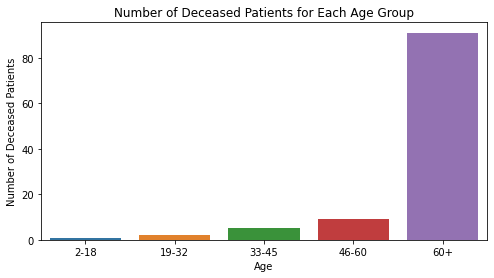

In [35]:
#Plotting the barchart
age_group_counts = deceased.age.value_counts()
plt.figure(figsize=(8, 4))
plt.title("Number of Deceased Patients for Each Age Group")
ax=sns.barplot(x=age_group_counts.index, y=age_group_counts);
ax.set(xlabel='Age', ylabel='Number of Deceased Patients')

As we can see from the chart above, the death rate is positively correlated to age, and it shows that the death rate is really high between individuals over 60 years old.

### 5.4 Training the Decision Tree Model
Here, we are going to train 2 models, 1 using the normalized data frame, and 1 using the discretized dataframe, then plot both of them and visualize the difference.

#### 5.4.1 Using the Normalized Dataframe

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_DT = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_DT))

Accuracy: 0.9595375722543352


In [37]:
y_pred_DT_val = clf.predict(X_val)
print("Accuracy for validation set:",accuracy_score(y_val, y_pred_DT_val))

Accuracy for validation set: 0.9653179190751445


#### Evaluation Metrics

In [38]:
confusion_matrix(y_test, y_pred_SVM)
print(classification_report(y_test, y_pred, target_names=['0','1']))
print(roc_auc_score(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       143
           1       0.78      0.47      0.58        30

    accuracy                           0.88       173
   macro avg       0.84      0.72      0.76       173
weighted avg       0.88      0.88      0.87       173

0.7465034965034966


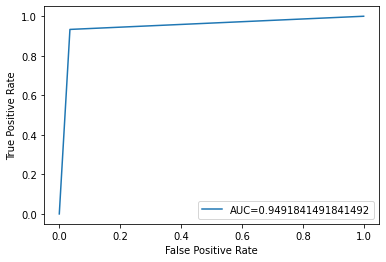

In [39]:
fpr_DT, tpr_DT, _ = roc_curve(y_test,  y_pred_DT)
auc_DT = roc_auc_score(y_test, y_pred_DT)

plt.plot(fpr_DT,tpr_DT,label="AUC="+str(auc_DT))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Visualizing the Tree

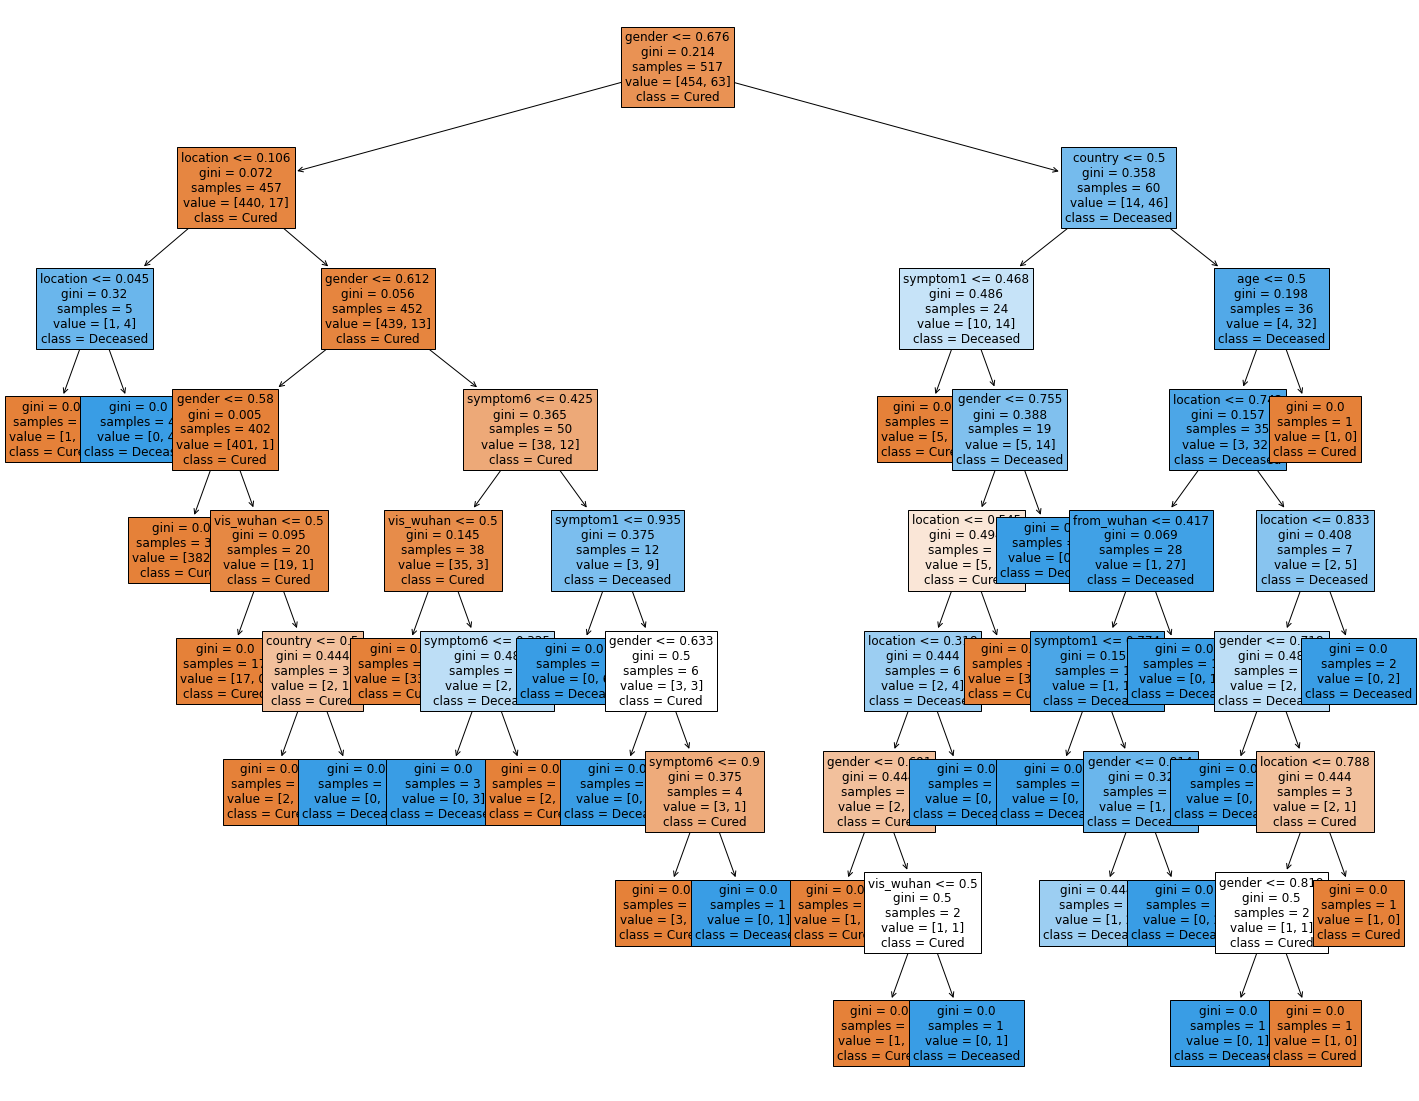

In [40]:
from sklearn import tree
feature_cols=['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6']
fig=plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names=feature_cols,
                  class_names={0:'Cured',1:'Deceased'},
                  filled=True,
                  fontsize=12)

#### 5.4.2 Using the Discretized Dataframe
The decision tree algorithm only works for numerical values, so for every categorical class, we need to assign a specific number to denote it. This is done by the label encoder.

##### Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataFrame[['age','diff_sym_hos','symptom1', 'symptom2','symptom3', 'symptom4']] = dataFrame[['age','diff_sym_hos','symptom1', 'symptom2','symptom3', 'symptom4']].apply(le.fit_transform)
dataFrame

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,4,1,0,1,3,1,3,3,1,3,1
1,101,8,0,3,0,1,1,3,1,3,3,1,0,0
2,137,8,1,3,0,1,1,3,1,3,3,1,2,0
3,116,8,0,3,1,0,1,3,1,3,3,1,0,0
4,116,8,1,3,0,0,1,3,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,0,0,0,1,3,1,3,3,1,0,1
859,0,0,2,2,0,0,1,3,1,3,3,1,0,0
860,3,1,1,3,0,0,1,3,1,3,3,1,0,0
861,24,9,1,3,0,0,1,3,1,3,3,1,0,0


In [42]:
#Splitting the data
X_DT = dataFrame.iloc[:,1:-1] # Features columns
y_DT = dataFrame['result'] # Target column
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT, y_DT, test_size=0.2, shuffle = True, random_state = 8)

#train the model
clf2 = clf.fit(X_train_DT,y_train_DT)
#Predict the response for test dataset
y_pred_DT2 = clf.predict(X_test_DT)
print("Accuracy:",accuracy_score(y_test_DT, y_pred_DT2))

Accuracy: 0.8554913294797688


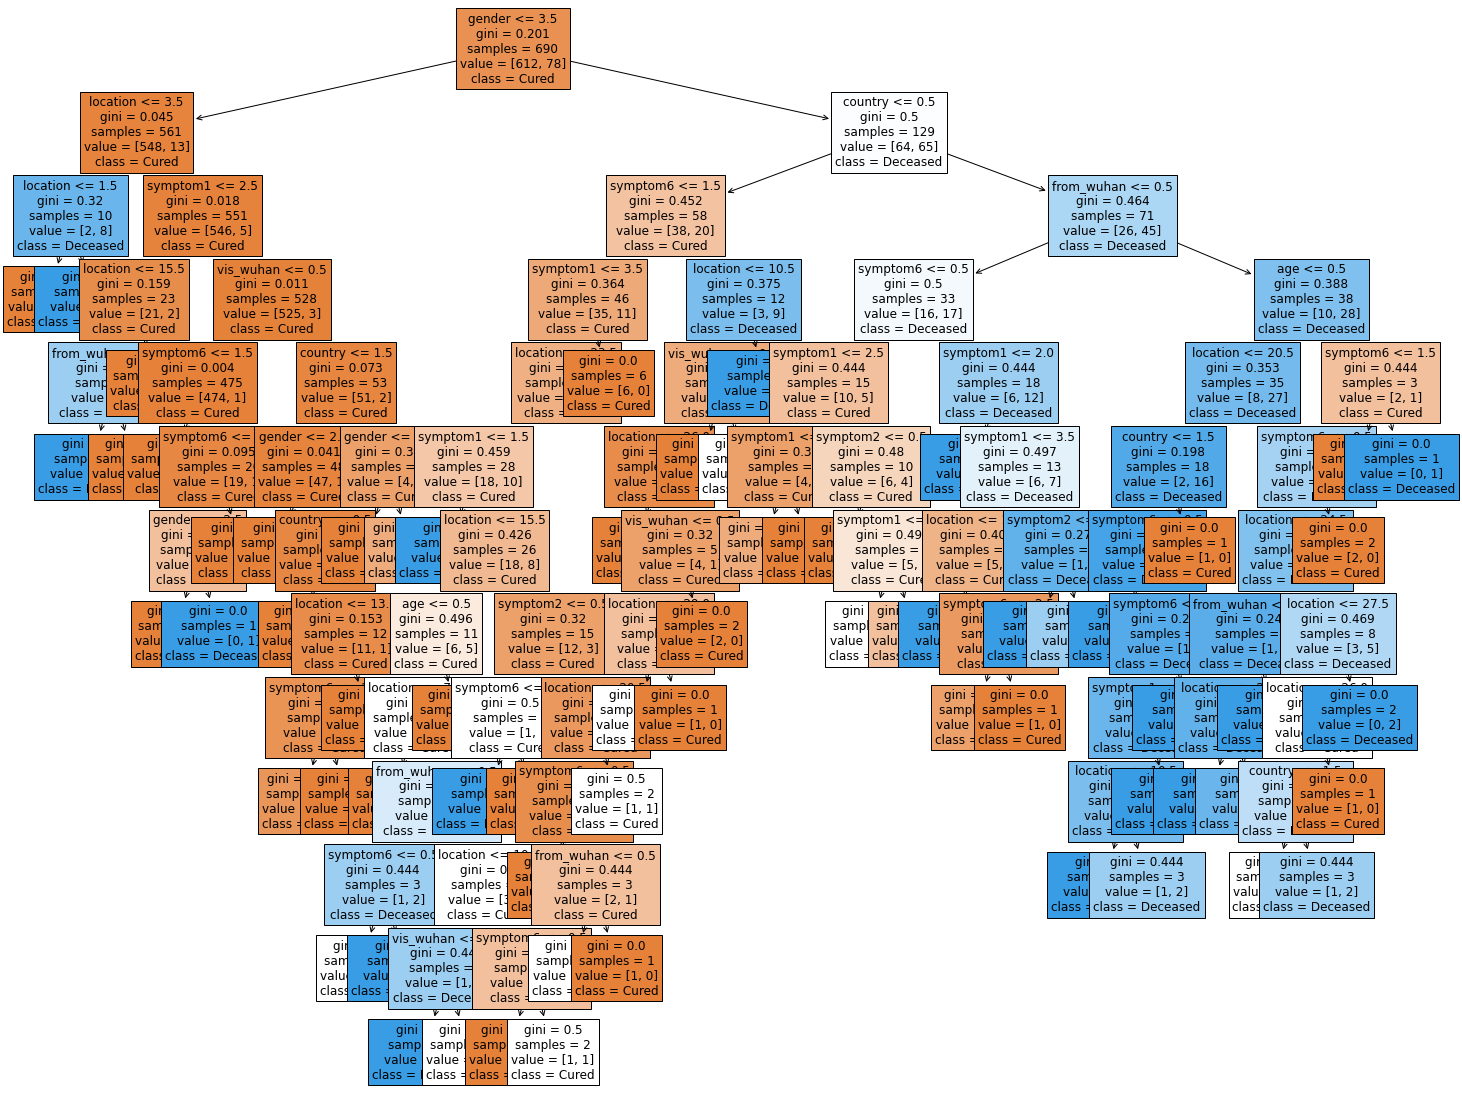

In [43]:
from sklearn import tree
feature_cols=['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6']
fig=plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf2,
                  feature_names=feature_cols,
                  class_names={0:'Cured',1:'Deceased'},
                  filled=True,
                  fontsize=12)

The tree is much bigger than the one generated using he normailized dataframe, we can try to solve this problem by tuning some hyperparameters such as minimal cost complexity pruning to reduce the tree length. But let's continue on our normalized dataframe (the 1st one) because it is far more accurate initially than the discretized dataframe

### 5.5 Hyperparameter Tuning for Decision Tree
Because we don't know the optimal tree length, we can train several models and visualize their accuracies in order to obtain the optimum maximum length for the tree.

Text(0, 0.5, 'Accuracy Score')

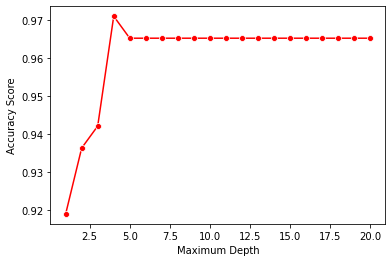

In [44]:
#tree depth from 1 to 21
val_score=[]
max=[i for i in range (1,21)]
for max_d in range(1,21):
  model_DT = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model_DT.fit(X_train, y_train)
  val_score.append(model_DT.score(X_val,y_val))
# val_score
sns.lineplot(x = max, y = val_score, marker = 'o', color='red')
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy Score")

Observe that the highest accuracy for the validation set is obtained at approximately 4, so we can try to train a new model with maximum depth=5, visualize it, and see if there is any difference in accuracy between and the tree in section 5.4.1.

In [45]:
clf_tuned = DecisionTreeClassifier(max_depth=4,random_state=42)
clf_tuned = clf_tuned.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_DT_tuned = clf_tuned.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred_DT_tuned))

Accuracy: 0.9479768786127167


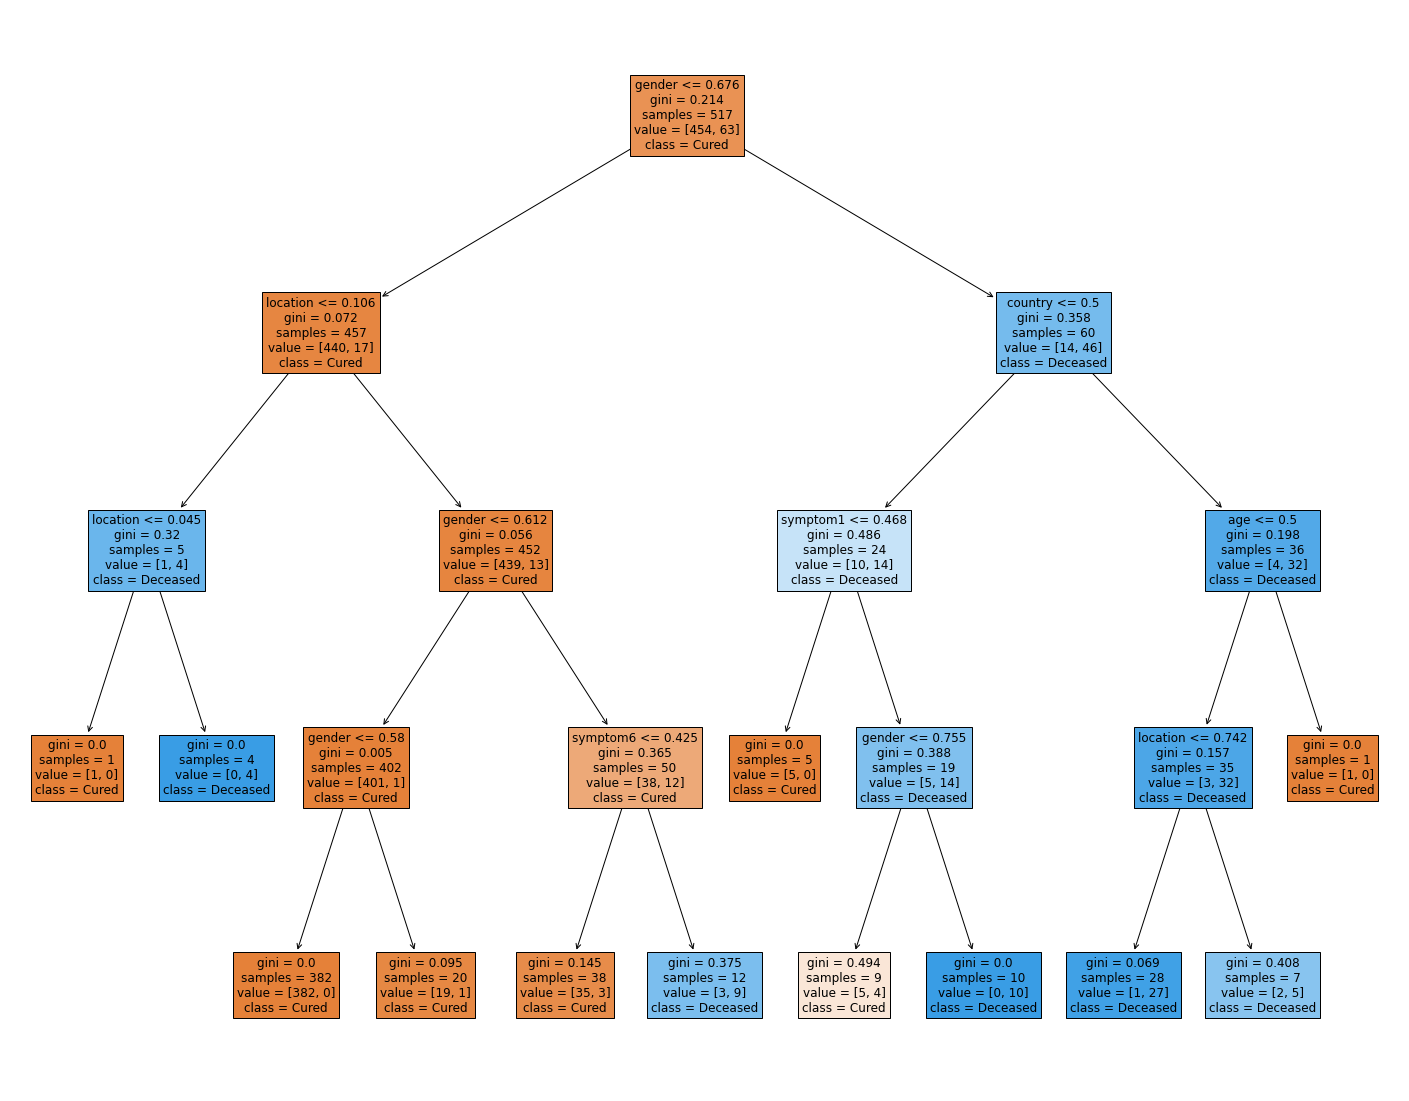

In [46]:
fig=plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tuned,
                  feature_names=feature_cols,
                  class_names={0:'Cured',1:'Deceased'},
                  filled=True,
                  fontsize=12)

The accuracy is less by 2% (94.8%) than the initial fit, however the tree is much more less complex and more likely better classifying new data points, because the first tree had 8 levels, which may cause overfitting to some degree, but the tree with 4 levels is much more less likely to overfit any data.

### 5.6 Evaluating Pruned Decision Tree

In [47]:
confusion_matrix(y_test, y_pred_DT_tuned)
print(classification_report(y_test, y_pred_DT_tuned, target_names=['0','1']))
print(roc_auc_score(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       143
           1       0.84      0.87      0.85        30

    accuracy                           0.95       173
   macro avg       0.91      0.92      0.91       173
weighted avg       0.95      0.95      0.95       173

0.9158508158508158


Notice that the ROC/AUC score is much more higher than the SVM and KNN.

## 6 Naive Bayes
The Naive Bayes Classifier is considered to be the simplest of all in this project, because it relies heavliy on probability and nothing else. Basically it's steps are as follows:
<ol>
    <li>Calculate prior probability for given class label</li>
    <li>Calculate conditional probability with each attribute for each class</li>
    <li>Multiply same class conditional probability</li>
    <li>Multiply prior probability with step 3 probability</li>
    <li>See which class has a higher probability, and classify the new data point accordingly</li>
</ol>

### 6.1 Training the Model

In [48]:
from sklearn.naive_bayes import GaussianNB
# Build a Gaussian Classifier
nb = GaussianNB()
# Model training
nb.fit(X_train, y_train)
# Predict Output
prediction_bayes = nb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, prediction_bayes))

Accuracy: 0.3468208092485549


Accuracy is only 34%, which is the least value up till now! However, we can try to solve this problem by some hyperparameter tuning using the grid search method. So let's try out the grid search method and see if there's any difference.

### 6.2 Naive Bayes Hyperparameter Tuning

In [49]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
#making a grid of 10 folds, each with 100 cells
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
prediction_bayes_2=grid_result.predict(X_test)
print("Accuracy:",accuracy_score(y_test, prediction_bayes_2))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Accuracy: 0.8265895953757225


Accuracy increased from 34% all the way up to 82.65! Not the best result still, but definetly better than the one before.

### 6.3 NB ROC/AUC curves

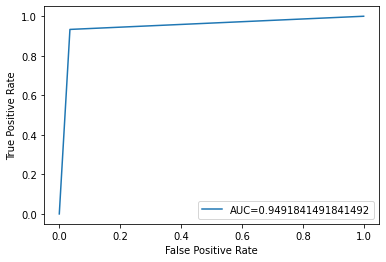

In [57]:
fpr_NB, tpr_NB, _ = roc_curve(y_test,  prediction_bayes_2)
auc_NB = roc_auc_score(y_test, prediction_bayes_2)

plt.plot(fpr_DT,tpr_DT,label="AUC="+str(auc_DT))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 6.4 Model Evaluation

In [50]:
confusion_matrix(y_test, prediction_bayes_2)
print(classification_report(y_test, prediction_bayes_2,labels=np.unique(prediction_bayes_2)))
print(roc_auc_score(y_test, prediction_bayes_2))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       143

   micro avg       0.83      1.00      0.91       143
   macro avg       0.83      1.00      0.91       143
weighted avg       0.83      1.00      0.91       143

0.5


## 7 Multilayer Perceptron

### 7.1 Training the Model

In [51]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
mlp = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
mlp.fit(X_train,y_train)

#Make the predictions
mpl_pred=mlp.predict(X_test)

#Test accuracy
print("Accuracy:",accuracy_score(y_test, mpl_pred))
print("Number of iterations",mlp.n_iter_)

Iteration 1, loss = 0.74262244
Iteration 2, loss = 0.60209166
Iteration 3, loss = 0.49808107
Iteration 4, loss = 0.42655740
Iteration 5, loss = 0.38536391
Iteration 6, loss = 0.36797727
Iteration 7, loss = 0.37014966
Iteration 8, loss = 0.37690643
Iteration 9, loss = 0.37958140
Iteration 10, loss = 0.37637992
Iteration 11, loss = 0.37010573
Iteration 12, loss = 0.36332266
Iteration 13, loss = 0.35872003
Iteration 14, loss = 0.35432948
Iteration 15, loss = 0.35009800
Iteration 16, loss = 0.34679188
Iteration 17, loss = 0.34308155
Iteration 18, loss = 0.33946037
Iteration 19, loss = 0.33527370
Iteration 20, loss = 0.33051620
Iteration 21, loss = 0.32608090
Iteration 22, loss = 0.32085905
Iteration 23, loss = 0.31548652
Iteration 24, loss = 0.31031878
Iteration 25, loss = 0.30487906
Iteration 26, loss = 0.29881665
Iteration 27, loss = 0.29392272
Iteration 28, loss = 0.28886502
Iteration 29, loss = 0.28314302
Iteration 30, loss = 0.27891482
Iteration 31, loss = 0.27339199
Iteration 32, los

The accuracy is 94.2% which is really good, but it took 168 iterations to converge which is way too much. Maybe we can adjust the learning rate.

### 7.2 Hyperparameter Tuning

After testing with several values for the learning rate we came to the following conclusions:


| Learning Rate | Accuracy | Iterations |
|---------------|----------|------------|
| 0.01          | 94.2%    | 148        |
| 0.1           | 94.2%    | 141        |
| 0.12          | 94.2%    | 56         |
| 0.15          | 93.1%    | 57         |
| 0.2           | 89.6     | 39         |

Hence 0.12 is the best value for the learning rate, because it achieves the wanted accuracy, with much more less iterations done.

In [52]:
# Create model object with the new learning rate
mlp2 = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.12)

# Fit data onto the model
mlp2.fit(X_train,y_train)

#Make the predictions
mpl_pred2=mlp2.predict(X_test)

#Test accuracy
print("Accuracy:",accuracy_score(y_test, mpl_pred2))
print("Number of iterations",mlp2.n_iter_)

Iteration 1, loss = 0.53213015
Iteration 2, loss = 0.47264546
Iteration 3, loss = 0.38226399
Iteration 4, loss = 0.37366266
Iteration 5, loss = 0.35805314
Iteration 6, loss = 0.34317966
Iteration 7, loss = 0.33048571
Iteration 8, loss = 0.32244996
Iteration 9, loss = 0.31200027
Iteration 10, loss = 0.29666368
Iteration 11, loss = 0.27699163
Iteration 12, loss = 0.26035160
Iteration 13, loss = 0.24259099
Iteration 14, loss = 0.22723527
Iteration 15, loss = 0.20861045
Iteration 16, loss = 0.23326709
Iteration 17, loss = 0.21444980
Iteration 18, loss = 0.20584321
Iteration 19, loss = 0.18991556
Iteration 20, loss = 0.20410696
Iteration 21, loss = 0.20921005
Iteration 22, loss = 0.16915312
Iteration 23, loss = 0.16424925
Iteration 24, loss = 0.14952176
Iteration 25, loss = 0.14209998
Iteration 26, loss = 0.14610099
Iteration 27, loss = 0.12885351
Iteration 28, loss = 0.12261514
Iteration 29, loss = 0.13354605
Iteration 30, loss = 0.13167340
Iteration 31, loss = 0.12379400
Iteration 32, los

### 7.3 Visualizing the Neural Network Architecture

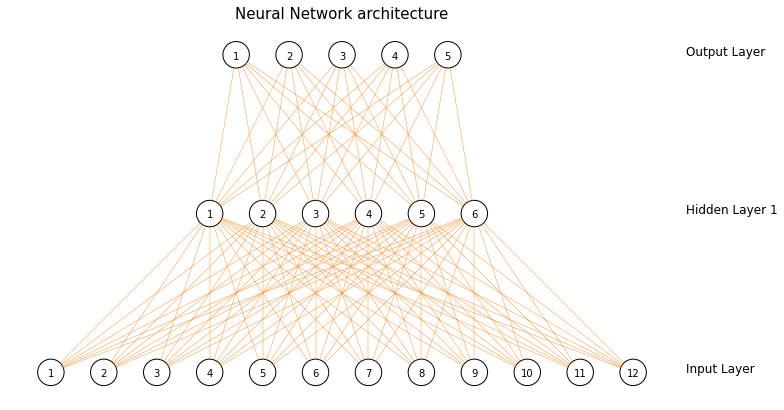

In [53]:
import VisualizeNN as VisNN
network_structure=np.hstack(([X_train.shape[1]],
                             np.asarray(mlp2.hidden_layer_sizes),
                            ))
network=VisNN.DrawNN(network_structure)
network.draw()

### 7.4 MLP ROC/AUC Curves

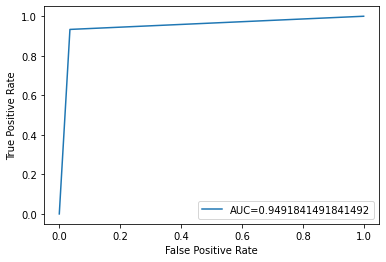

In [59]:
fpr_MLP, tpr_MLP, _ = roc_curve(y_test,  mpl_pred2)
auc_MLP = roc_auc_score(y_test, mpl_pred2)

plt.plot(fpr_DT,tpr_DT,label="AUC="+str(auc_DT))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 7.5 Evaluation Metrics

In [60]:
confusion_matrix(y_test, mpl_pred2)
print(classification_report(y_test, mpl_pred2, target_names=['0','1']))
print(roc_auc_score(y_test, mpl_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       143
           1       0.86      0.80      0.83        30

    accuracy                           0.94       173
   macro avg       0.91      0.89      0.90       173
weighted avg       0.94      0.94      0.94       173

0.886013986013986


## 8 Conclusion and Final Remarks

To wrap things up, we looked at 5 different classification algorithms, each with different complexities and accuracies. The accuracies of the all classifiers were as follows:

|                  **Classifier**                 | **Accuracy** |
|:-----------------------------------------------:|:------------:|
|                       KNN                       |     88.4%    |
|                       SVM                       |    90.75%    |
|          Decision Tree (Normalized DF)          |     95.9%    |
|          Decision Tree (Discretized DF)         |     85.6%    |
|         Pruned Decision Tree (4 Levels)         |     94.8%    |
|                   Naive Bayes                   |     34.6%    |
|          Naive Bayes using Grid Search          |    82.65%    |
|      Multiliayer Perceptron (168 iteration)     |     94.2%    |
| Multilayer Perceptron using tuned learning rate |     94.2%    |

Out of the 5 classifiers, the decision tree and the multi-layer perceptron had the best accuracies, however the decision tree is less computationally expensive than the multi-layer perceptron. This may be because the dataset is somehow set using many categorical features. In other cases the multi-layer perceptron, with the right hyperparameters, might be a much better option if most features were numeric.